In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def read_summary(filename):
    with open(filename, "r") as f:
        d = {"L":[], "p":[], "perc_prob": [], "perc_prob_variance":[]}
        lines = f.readlines()
        for line in lines:
            s = line.split()
            values = s[1::2]
            d["L"].append(int(values[0]))
            d["p"].append(float(values[1]))
            d["perc_prob"].append(float(values[2]))
            d["perc_prob_variance"].append(float(values[3]))
        df = pd.DataFrame.from_dict(d)
        df = df.sort_values('L')
        return df

df_2d = read_summary("sum_2d/2d.txt")
print(df_2d.to_string())

      L      p  perc_prob  perc_prob_variance
31   32  0.675     0.9934            0.000001
1    32  0.650     0.9703            0.000001
48   32  0.700     0.9995            0.000000
49   32  0.600     0.7055            0.000010
22   32  0.625     0.8858            0.000009
35   32  0.550     0.2021            0.000012
8    32  0.575     0.4291            0.000047
41   32  0.525     0.0663            0.000012
17   32  0.500     0.0165            0.000002
26   64  0.610     0.8656            0.000011
24   64  0.591     0.6056            0.000014
20   64  0.570     0.2373            0.000028
18   64  0.560     0.1230            0.000009
16   64  0.600     0.7445            0.000040
0    64  0.550     0.0553            0.000005
13   64  0.593     0.6326            0.000012
39   64  0.580     0.4038            0.000046
42   64  0.592     0.6153            0.000052
9    64  0.620     0.9425            0.000008
5    64  0.595     0.6760            0.000024
45   64  0.590     0.5883         

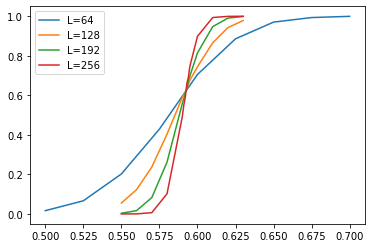

In [21]:
fig, ax = plt.subplots()
df_L32 = df_2d[df_2d["L"] == 32]
df_L64 = df_2d[df_2d["L"] == 64]
df_L128 = df_2d[df_2d["L"] == 128]
df_L256 = df_2d[df_2d["L"] == 256]

dfs = [df_L32, df_L64, df_L128, df_L256]

for i,df in enumerate(dfs):
    df = df.sort_values("p")
    p = df["p"]
    P = df["perc_prob"]

    ax.plot(p, P, label=f"L={32*(2*(i+1))}")
ax.legend()